In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical


In [3]:
data = pd.read_csv('mnist_train.csv')


In [4]:
#Separate the features (RGB pixel values) and labels from the data:
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

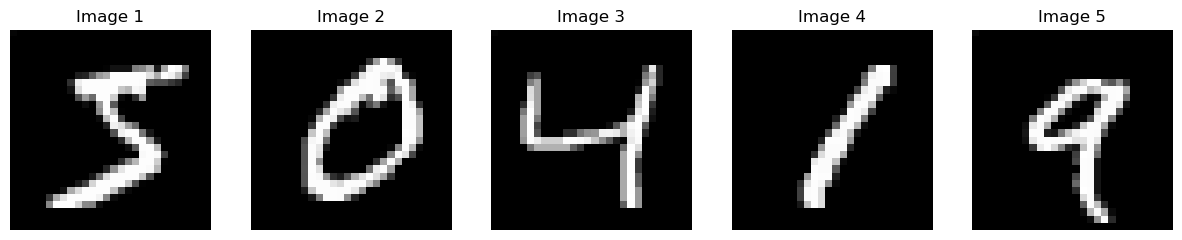

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Convert the images to grayscale
gray_images = np.squeeze(features, axis=-1)

# Display the first five grayscale images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, ax in enumerate(axes):
    ax.imshow(gray_images[i], cmap='gray')
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.show()


In [6]:
#Reshape the features to match the image dimensions:
features = features.reshape(-1,28, 28, 1)


In [7]:
# Convert labels to numeric values
labels = labels.astype('float32')

In [8]:
#Split the data into training and test sets:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)


In [9]:
#Normalize the pixel values:
train_features = train_features.astype('float32') / 255.0
test_features = test_features.astype('float32') / 255.0

In [11]:
image_height=28
image_width=28
num_channels=1

In [13]:
#Standardize the features using StandardScaler:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features.reshape(-1, image_height * image_width * num_channels)).reshape(-1, image_height, image_width, num_channels)
test_features = scaler.transform(test_features.reshape(-1, image_height * image_width * num_channels)).reshape(-1, image_height, image_width, num_channels)

In [14]:
#Convert the labels to categorical format if necessary:
num_classes = len(np.unique(labels))
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)


In [15]:
#Build the CNN model:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [16]:
#Compile the model:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
#Build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [18]:
#Make predictions on the test set:
y_pred = model.predict(test_features)


375/375 [==============================] - 5s 12ms/step


In [19]:
#Calculate rmse
rmse = np.sqrt(mean_squared_error(test_labels, y_pred))
print("RMSE:", rmse)


RMSE: 0.0


In [22]:

# Calculate the RMSE
train_predictions = model.predict(train_features)
train_predictions = np.argmax(train_predictions, axis=1)
train_rmse = np.sqrt(mean_squared_error(train_labels, train_predictions))
print("Train RMSE:", train_rmse)

1500/1500 [==============================] - 15s 10ms/step
Train RMSE: 1.0


In [24]:
test_predictions = model.predict(test_features)
test_predictions = np.argmax(test_predictions, axis=1)
test_rmse = np.sqrt(mean_squared_error(test_labels, test_predictions))
print("Test RMSE:", test_rmse)

375/375 [==============================] - 4s 11ms/step
Test RMSE: 1.0


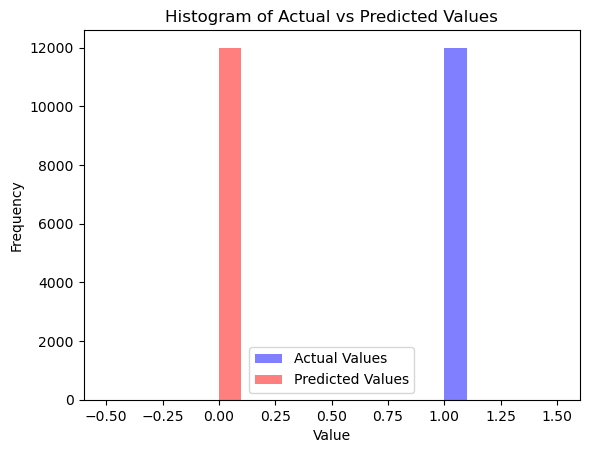

In [26]:
import matplotlib.pyplot as plt

# Assuming you have two arrays: actual_values and predicted_values

# Plot histogram for actual values
plt.hist(test_labels, bins=10, color='blue', alpha=0.5, label='Actual Values')

# Plot histogram for predicted values
plt.hist(test_predictions, bins=10, color='red', alpha=0.5, label='Predicted Values')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()
